# Video Game Sales Analysis
## Project Overview

This project analyzes video game sales data to identify patterns that determine a game's success.

## Environment Setup and Required Libraries

In [15]:
%%html
<style>
    table {
        margin-left: 0 !important;
    }
</style>

In [10]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## 1&emsp;Load Data

In [2]:
games = pd.read_csv('/datasets/games.csv')

### 1.1&emsp;Helper classes for presenting a formatted analysis of a dataframe

__DataframeColumn class__ 

>The DataframeColumn class describes a column within a dataframe.  

__Attributes__

| Name | Description |
| :- | :- |
| name | The column name |
| non_null_count | The number of non-null cells |
| data_type | The type of data in the column |

<br>
<br>

__Methods__

>\_\_init\_\_ - Initializer

<div style="display: inline-block">

| Parameter | Description |
| :- | :- |
| name | The column name |
| non_null_count | The number of non-null cells |
| data_type | The type of data in the column |

</div>

In [6]:
class DataframeColumn:
    name = ''
    non_null_count = 0
    data_type = ''

    def __init__(self, name, non_null_count, data_type):
        self.name = name
        self.non_null_count = non_null_count
        self.data_type = data_type

__DataframeInfo class__ 

>The DataframeInfo class provides a detailed description of a dataframe.

__Attributes__

<div style="display: inline-block">

| Name | Description |
| :- | :- |
| row_count | The number of rows |
| duplicate_row_count | The number of duplicate rows |
| columns | A list of the columns within the dataframe |

</div>
<br>

__Methods__

>\_\_init\_\_ - Initializer

<div style="display: inline-block">

| Parameter | Description |
| :- | :- |
| df | The dataframe object |

</div>
<br>
<br>

>info - Prints detailed information describing the dataframe

In [7]:
class DataframeInfo:
    row_count = 0
    duplicate_row_count = 0
    columns = []

    def __init__(self, df):
        self.row_count = len(df)
        self.duplicate_row_count = df.duplicated().sum()
        df_columns = df.columns.tolist()
        df_non_null_count = df.count().tolist()
        df_data_types = df.dtypes.tolist()
        n = len(df_columns)

        for c in range(n):
            dfc = DataframeColumn(df_columns[c],
                                  df_non_null_count[c],
                                  df_data_types[c])
            self.columns.append(dfc)

    def info(self):
        print(f'Rows: {self.row_count}')
        print(f'Duplicate rows: {self.duplicate_row_count}')
        print()
        col_headers = ['Column', 'Non-null', 'Data type']
        col_width = [15, 10, 12]
        print(
            f'{col_headers[0]:<{col_width[0]}}{col_headers[1]:>{col_width[1]}}   {col_headers[2]:<{col_width[2]}}')

        for c in self.columns:
            print(
                f'{c.name:<{col_width[0]}}{c.non_null_count:>{col_width[1]}}   {c.data_type.name:<{col_width[2]}}')

### 1.2&emsp;Functions for use with the dataframe helper classes

>is_float_string - Determines whether a string can be converted to a float.
>>Returns True, if the string can be converted to a float; otherwise, False.

<div style="display: inline-block">

| Parameter | Description |
| :- | :- |
| value | The string value to test |

</div>

In [ ]:
def is_float_string(value):
    """
    Checks if a string can be converted to a float.
    Handles None values by returning False.
    """
    if value is None:
        return False
    try:
        float(value)
        return True
    except ValueError:
        return False

>analyze_column_data - Analyzes the data within a column, and prints a summary of the data.

<div style="display: inline-block">

| Parameter | Description |
| :- | :- |
| series | The data from the column |
| dataframe_column | The corresponding DataframeColumn object |

</div>

In [6]:
def analyze_column_data(series, dataframe_column):
    series_length = len(series)
    is_float_type = (dataframe_column.data_type.name == 'float64')
    integer_analysis = ''

    if is_float_type:
        integer_value_count = series.apply(lambda x: x.is_integer()).sum()
        non_integer_value_count = series_length - integer_value_count
        integer_analysis = f"""Integer values:     {integer_value_count}
Non-integer values: {non_integer_value_count}
"""

    is_object_data_type = (dataframe_column.data_type.name == 'object')
    object_analysis = ''

    if is_object_data_type:
        numeric_value_count = series.str.isnumeric().sum()
        non_numeric_value_count = series_length - \
            series.apply(is_float_string).sum()

        object_analysis = f"""Numeric values:     {numeric_value_count}
Non-numeric values: {non_numeric_value_count}
"""

    analysis = f"""
Column:             {dataframe_column.name}
Data type:          {dataframe_column.data_type.name}
Non-null:           {dataframe_column.non_null_count}
N/A count:          {series.isna().sum()}
Unique values:      {series.nunique()}"""

    print(analysis)

    if is_float_type:
        print(integer_analysis)

    if is_object_data_type:
        print(object_analysis)

>analyze_dataset- Analyzes the data in a dataset and prints a summary.

<div style="display: inline-block">

| Parameter | Description |
| :- | :- |
| df | The dataset (dataframe) |

</div>

In [ ]:
def analyze_dataset(df):
    df_info = DataframeInfo(df)
    df_info.info()

    n = len(df_info.columns)

    for c in range(n):
        col = df_info.columns[c]
        analyze_column_data(df[col.name], df_info.columns[c])

    return df_info

### 1.3&emsp;Analysis of the dataset

In [ ]:
games_info = analyze_dataset(games)

Rows: 16715
Duplicate rows: 0

Column           Non-null   Data type   
Name                16713   object      
Platform            16715   object      
Year_of_Release     16446   float64     
Genre               16713   object      
NA_sales            16715   float64     
EU_sales            16715   float64     
JP_sales            16715   float64     
Other_sales         16715   float64     
Critic_Score         8137   float64     
User_Score          10014   object      
Rating               9949   object      

Column:             Name
Data type:          object
Non-null:           16713
N/A count:          2
Unique values:      11559
Numeric values:     1
Non-numeric values: 16712


Column:             Platform
Data type:          object
Non-null:           16715
N/A count:          0
Unique values:      31
Numeric values:     133
Non-numeric values: 16582


Column:             Year_of_Release
Data type:          float64
Non-null:           16446
N/A count:          269
Unique 

### 1.4&emsp;Dataset Analysis Summary

There are 16715 records in the dataset.
The data types of the columns are shown above.

* Issues / Patterns / Anomalies
    * Platform
        * This column has 31 unique values.
        * Convert to a category.
    * Year_of_Release
        * This column has 269 na cells, which should be excluded, if the analysis is based on the release year.
        * The non-null values in this column are all integers.
            * After removing the na cells, convert the column to int64.
    * Genre
        * This column has 12 unique values.
        * Convert to a category.
        * There are two instances of na cells, which should be excluded, if the analysis is based on the genre.
    * Critic_Score
        * This column has 8578 na cells, which should be excluded, if the analysis is based on the critic's score.
    * User_Score
        * This column has 6701 na cells, which should be excluded, if the analysis is based on the user's score.
        * This data type of this column is object; however, it would be expected to be float64.
        * There are 2424 non-numeric values (tbd). Convert these values to na.
            * If the analysis is baesd on the user's score, Exclude these values, and convert the column to float64.
    * Rating
        * There are 6766 na cells. Set these cells to a new NR (Not Rated) category.
        * This column has 8 unique values.
        * Convert to a category after replacing the na cell values.

## 2&emsp;Data Preparation

### 2.1&emsp;Standardizing Column Names  
Convert all column names to lowercase

In [10]:
games.rename(columns=str.lower, inplace=True)

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.2&emsp;Data Type Conversion

Replace any NA cells in the Rating column with 'NR' (Not Rated)

In [ ]:
games.rating = games.rating.fillna('NR')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR


The platform, genre, and rating columns should be categories. These columns contain discrete values.

In [13]:
games = games.astype({'platform': 'category', 'genre': 'category', 'rating': 'category'})
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       10014 non-null  object  
 10  rating           16715 non-null  category
dtypes: category(3), float64(6), object(2)
memory usage: 1.1+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR


In [14]:
games.platform.cat.categories

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object')

In [15]:
games.genre.cat.categories

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object')

In [16]:
games.rating.cat.categories

Index(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'NR', 'RP', 'T'], dtype='object')

Replace 'tbd' scores with NaN. These scores have not been reported.

In [ ]:
games.user_score = games.user_score.replace('tbd', np.nan)

In [18]:
# Verify that the operation was successful.
games[games.user_score == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Convert the user_score column to float64

In [ ]:
games = games.astype({'user_score': 'float64'})
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           16715 non-null  category
dtypes: category(3), float64(7), object(1)
memory usage: 1.1+ MB


### 2.3&emsp;Handling Missing Values

Determine the number of missing values for each column

In [20]:
# Examine missing values
row_count = len(games)
missing_name = games.name.isna().sum()
missing_platform = games.platform.isna().sum()
missing_year = games.year_of_release.isna().sum()
missing_genre = games.genre.isna().sum()
missing_na_sales = games.na_sales.isna().sum()
missing_eu_sales = games.eu_sales.isna().sum()
missing_jp_sales = games.jp_sales.isna().sum()
missing_other_sales = games.other_sales.isna().sum()
missing_critic_score = games.critic_score.isna().sum()
missing_user_score = games.user_score.isna().sum()
missing_rating = games.rating.isna().sum()
print(f'Missing name: {missing_name}')
print(f'Missing platform: {missing_platform}')
print(f'Missing year: {missing_year}')
print(f'Missing genre: {missing_genre}')
print(f'Missing NA sales: {missing_na_sales}')
print(f'Missing EU sales: {missing_eu_sales}')
print(f'Missing JP sales: {missing_jp_sales}')
print(f'Missing Other sales: {missing_other_sales}')
print(f'Missing critic score: {missing_critic_score}')
print(f'Missing user score: {missing_user_score}')
print(f'Missing rating: {missing_rating}')

Missing name: 2
Missing platform: 0
Missing year: 269
Missing genre: 2
Missing NA sales: 0
Missing EU sales: 0
Missing JP sales: 0
Missing Other sales: 0
Missing critic score: 8578
Missing user score: 9125
Missing rating: 0


Determine the percentage of missing values within each column

In [21]:
def percentage_of_missing_values(n):
    return n / row_count

In [22]:
# Calculate percentage of missing values
print(f'Missing name: {percentage_of_missing_values(missing_name):.2%}')
print(f'Missing platform: {percentage_of_missing_values(missing_platform):.2%}')
print(f'Missing year: {percentage_of_missing_values(missing_year):.2%}')
print(f'Missing genre: {percentage_of_missing_values(missing_genre):.2%}')
print(f'Missing NA sales: {percentage_of_missing_values(missing_na_sales):.2%}')
print(f'Missing EU sales: {percentage_of_missing_values(missing_eu_sales):.2%}')
print(f'Missing JP sales: {percentage_of_missing_values(missing_jp_sales):.2%}')
print(f'Missing Other sales: {percentage_of_missing_values(missing_other_sales):.2%}')
print(f'Missing critic score: {percentage_of_missing_values(missing_critic_score):.2%}')
print(f'Missing user score: {percentage_of_missing_values(missing_user_score):.2%}')
print(f'Missing rating: {percentage_of_missing_values(missing_rating):.2%}')

Missing name: 0.01%
Missing platform: 0.00%
Missing year: 1.61%
Missing genre: 0.01%
Missing NA sales: 0.00%
Missing EU sales: 0.00%
Missing JP sales: 0.00%
Missing Other sales: 0.00%
Missing critic score: 51.32%
Missing user score: 54.59%
Missing rating: 0.00%


### 2.4&emsp;Analyze patterns in missing values

* The number of rows with a missing name is insignificant.
    * These rows can be included in the analysis because the analysis is not based on the game name.
* The number of rows without a release year is small (269; 1.61%).
    * These rows can be excluded.
    * After removing these rows, convert the column to int64.
* The number of rows without a genre is small (2; 0.01%).
    * These rows can be excluded.
* More than half of the rows do not have a critic score and/or a user score.
    * If the analysis involves these scores, exclude these rows; otherwise, they may be included.

Remove rows without a release year.
The resulting row count should be 16715 - 269 = 16446

In [ ]:
games = games[~games.year_of_release.isna()]
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR


Change data type for year_of_release to int64

In [24]:
games = games.astype({'year_of_release': 'int64'})
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16446 non-null  category
 2   year_of_release  16446 non-null  int64   
 3   genre            16444 non-null  category
 4   na_sales         16446 non-null  float64 
 5   eu_sales         16446 non-null  float64 
 6   jp_sales         16446 non-null  float64 
 7   other_sales      16446 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           16446 non-null  category
dtypes: category(3), float64(6), int64(1), object(1)
memory usage: 1.2+ MB


Remove rows without a genre
Resulting row count should be 16446 - 2 = 16444

In [ ]:
games = games[~games.genre.isna()]
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR


### 2.5&emsp;Calculate Total Sales

Calculate total sales across all regions and store in a new column

In [ ]:
games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR,0.01


## 3&emsp;Analyzing Video Game Sales Data

### 3.1&emsp;Temporal Analysis of Game Releases

Examine distribution of game releases across different years.
This will clarify data coverage and significance.

Create a Dataframe with game releases by year

In [ ]:
game_releases_by_year = games.groupby('year_of_release').count()['name']
game_releases_by_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Create a visualization of game distribution across the years

<AxesSubplot:title={'center':'Game Releases by Year'}>

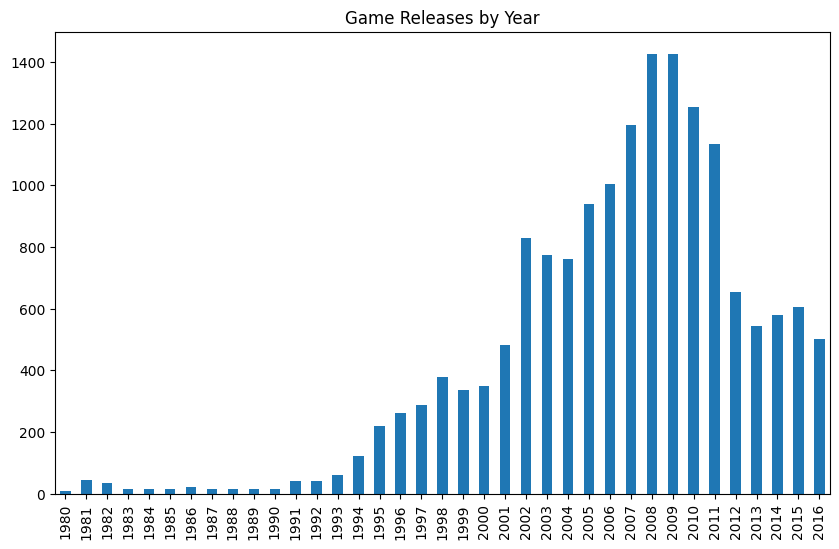

In [28]:
# Visualize the distribution of games across years
game_releases_by_year.plot(kind='bar',
                           xlabel='',
                           title='Game Releases by Year',
                           figsize=(10,6)
                          )

Show summary statistics for each year

In [30]:
top_5_years = game_releases_by_year.nlargest(n=5)
top_5_years_sum = top_5_years.sum()
total_releases = game_releases_by_year.sum()
last_5_years_sum = game_releases_by_year[-5:].sum()
last_10_years_sum = game_releases_by_year[-10:].sum()

print(f"""
Year with fewest number of releases:   {game_releases_by_year.idxmin()} ({game_releases_by_year.min()})
Year with greatest number of releases: {game_releases_by_year.idxmax()} ({game_releases_by_year.max()})
Variance: {game_releases_by_year.var()}
Std Dev:  {game_releases_by_year.std()}

Total number of releases: {total_releases}
Top 5 years: {top_5_years}
Total: {top_5_years_sum} ({top_5_years_sum / total_releases:.2%})

Last 5 years:  {last_5_years_sum} ({last_5_years_sum / total_releases:.2%})
Last 10 years: {last_10_years_sum} ({last_10_years_sum / total_releases:.2%})
""")


Year with fewest number of releases:   1980 (9)
Year with greatest number of releases: 2008 (1427)
Variance: 203946.47447447444
Std Dev:  451.60433398548605

Total number of releases: 16444
Top 5 years: year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: name, dtype: int64
Total: 6441 (39.17%)

Last 5 years:  2886 (17.55%)
Last 10 years: 9327 (56.72%)



__Observations__

>The most significant numbers of game releases occurred in 2008 and 2009.  
>There was a somewhat steady upward trend beginning in 1991, which continued through 2009.  
>Releases began a steady decline in 2010, which continued through 2016.  
>There was a preciptous drop in releases from 2011 to 2012.  
>Data for the last 5 years (2012-2016) is relatively consistent, and would be appropriate for predicting 2017.

### 3.2&emsp;Platform Sales Analysis Over Time

Calculate total sales by platform and year

In [ ]:
game_sales_by_platform_and_year = games.pivot_table(values='total_sales',
                                                    index='platform',
                                                    columns='year_of_release',
                                                    aggfunc='sum',
                                                    fill_value=0
                                                   )
game_sales_by_platform_and_year

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Use a heatmap to visualize platform sales over time

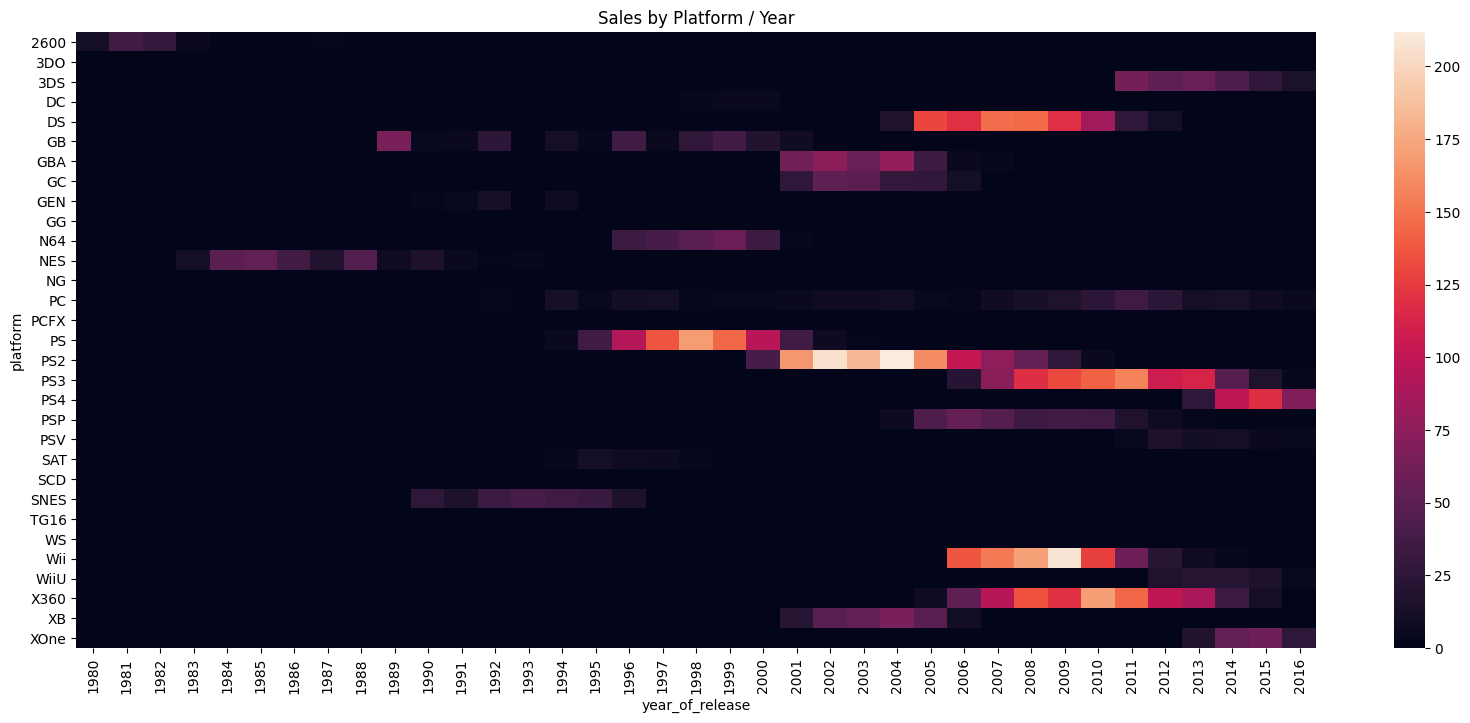

In [33]:
plt.figure(figsize=(20, 8))
plt.xlabel('Release Year')
plt.ylabel('Platform')
plt.title('Sales by Platform / Year')
sns.heatmap(game_sales_by_platform_and_year,
            annot=False,
           )
plt.show()

__Observations__

Platforms with significant sales typically last from 6-8 years.  
The most successful platforms have been
>DS  
>PS  
>PS2  
>PS3  
>PS4  
>Wii  
>X360

In the case of the PlayStation platforms, each "declining" platform was replaced by an upgraded PlayStation platform.  
Xbox (XB) was replaced by Xbox 360 (X360), which was then replaced by Xbox One (XOne). Of these, Xbox 360 was the most successful.

### 3.3&emsp;Determining Relevant Time Period for Predicting 2017 Sales

As demonstrated above (see Observations at the end of 3.1), the appropriate time period for predicting 2017 sales is 2012-2016.  
Data for those years (2012-2016) is relatively consistent, and would be appropriate for predicting 2017.  
Data for years immediately before 2012 was significantly higher.

In [34]:
relevant_years = [2012, 2013, 2014, 2015, 2016]
games_for_predicting_2017_sales = games[games.year_of_release.isin(relevant_years)]
games_for_predicting_2017_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NR,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01


### 3.4&emsp;Platform Performance Analysis

Determine the total sales for each platform in the years 2012-2016

In [35]:
relevant_platform_sales = games_for_predicting_2017_sales[['platform', 'total_sales']]
relevant_platform_sales = relevant_platform_sales.sort_values('platform')
relevant_platform_sales = relevant_platform_sales.groupby('platform').sum()
relevant_platform_sales = relevant_platform_sales[relevant_platform_sales.total_sales > 0.0]
relevant_platform_sales = relevant_platform_sales.sort_values('total_sales', ascending=False)
relevant_platform_sales = relevant_platform_sales.reset_index()
relevant_platform_sales

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Use the Top 5 platforms for predictions

In [ ]:
relevant_platform_sales = relevant_platform_sales.loc[0:4]
relevant_platform_sales

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


Calculate year-over-year growth for each of the Top 5 platforms

In [ ]:
games_for_predicting_2017_platform_growth = games_for_predicting_2017_sales[games_for_predicting_2017_sales.platform.isin(relevant_platform_sales.platform)]

# The astype() statement is necessary to avoid an error: "A value is trying to be set on a copy of a slice from a DataFrame."
games_for_predicting_2017_platform_growth = games_for_predicting_2017_platform_growth.astype({'platform': 'category'})
games_for_predicting_2017_platform_growth.platform = games_for_predicting_2017_platform_growth.platform.cat.remove_unused_categories()

games_for_predicting_2017_platform_growth = games_for_predicting_2017_platform_growth.pivot_table(values='total_sales',
                                                                                                  index='year_of_release',
                                                                                                  columns='platform',
                                                                                                  aggfunc='sum',
                                                                                                  fill_value=0
                                                                                                 )
games_for_predicting_2017_platform_growth

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2012,51.36,107.36,0.00,99.74,0.00
2013,56.57,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


Visualize the growth of the Top 5 platforms in the years 2012-2016

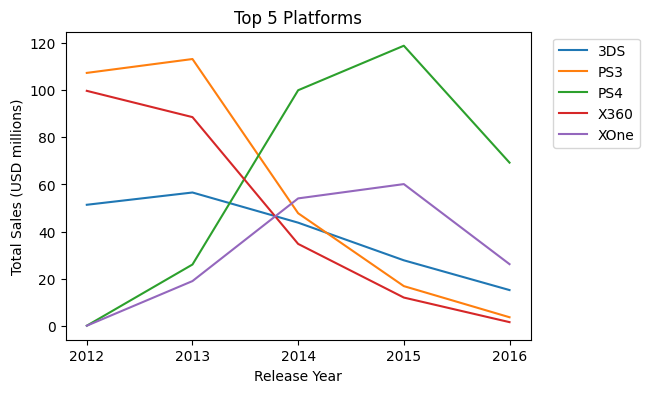

In [38]:
ax = games_for_predicting_2017_platform_growth.plot(kind='line',
                                               ylabel='Total Sales (USD millions)',
                                               xlabel='Release Year',
                                               title='Top 5 Platforms',
                                               figsize=(6, 4)
                                              )
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.show()

__Observations__
>All platforms declined in sales from 2015 to 2016.  
>PS4 and XOne were released in 2013.  
>>Both grew in sales through 2015, with PS4 having 2x the sales of XOne.
>
>PS3, 3DS, and X360 declined in sales overall during the five year period.    
>>PS3 and X360 had virtually non-existent sales by 2016.  

### 3.5&emsp;Sales Distribution Analysis

#### 3.5.1&emsp;Calculate the total sales by platform

In [ ]:
game_sales_by_platform = games[['platform', 'total_sales']]
game_sales_by_platform = game_sales_by_platform.groupby('platform').sum()
game_sales_by_platform

,total_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,28.35


Use a box plot to visualize the sales by platform

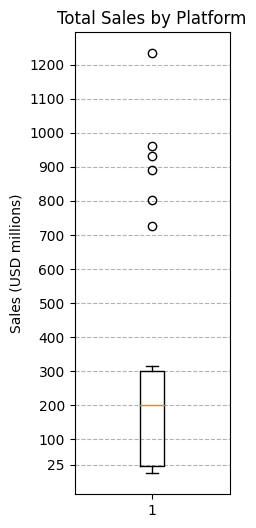

In [ ]:
plt.figure(figsize=(2,6))
plt.boxplot(game_sales_by_platform.total_sales)
plt.title('Total Sales by Platform')
plt.ylabel('Sales (USD millions)')
plt.yticks([25,100,200,300,400,500,600,700,800,900,1000,1100,1200])
plt.grid(axis='y',
         linestyle='--',
         color='gray',
         alpha=0.6
        )
plt.show()

__Observations__
>Half of the platforms have sales between $25M and $300M.  
>Most platforms have sales of no more than $300M.  
>Eight platforms (25% of 31) have sales exceeding $300M.
>>Six of these exceed $700M, with one exceeding $1200M ($1.2B).

#### 3.5.2&emsp;Compare average sales per year for each platform

In [41]:
# Use game sales by platform and year as the basis
game_sales_for_stats = game_sales_by_platform_and_year

# Replace zeroes with NaN, so that they will not be included in the statistics
game_sales_for_stats = game_sales_for_stats.replace(0.0, np.nan)

platform_stats = pd.DataFrame(game_sales_for_stats.sum(axis=1))
platform_stats.columns=['sum']
platform_stats['mean'] = game_sales_for_stats.mean(axis=1)
platform_stats['min'] = game_sales_for_stats.min(axis=1)
platform_stats['max'] = game_sales_for_stats.max(axis=1)
platform_stats['var'] = game_sales_for_stats.var(axis=1)
platform_stats['std_dev'] = game_sales_for_stats.std(axis=1)
platform_stats

,sum,mean,min,max,var,std_dev
platform,,,,,,
2600,86.48,8.648000,0.27,35.68,169.808907,13.031075
3DO,0.10,0.050000,0.02,0.08,0.001800,0.042426
3DS,257.81,42.968333,15.14,63.20,334.094817,18.278261
DC,15.95,2.278571,0.02,5.99,6.469648,2.543550
DS,802.78,72.980000,0.02,146.94,3803.578040,61.673155
GB,254.43,19.571538,1.43,64.97,340.977647,18.465580
GBA,312.88,39.110000,0.07,77.91,1073.758514,32.768255
GC,196.73,28.104286,0.27,51.81,355.134162,18.845004
GEN,28.35,5.670000,0.65,12.64,22.763350,4.771095


<AxesSubplot:title={'center':'Average Sales per Year'}, xlabel='Platform', ylabel='Average Sales (USD millions)'>

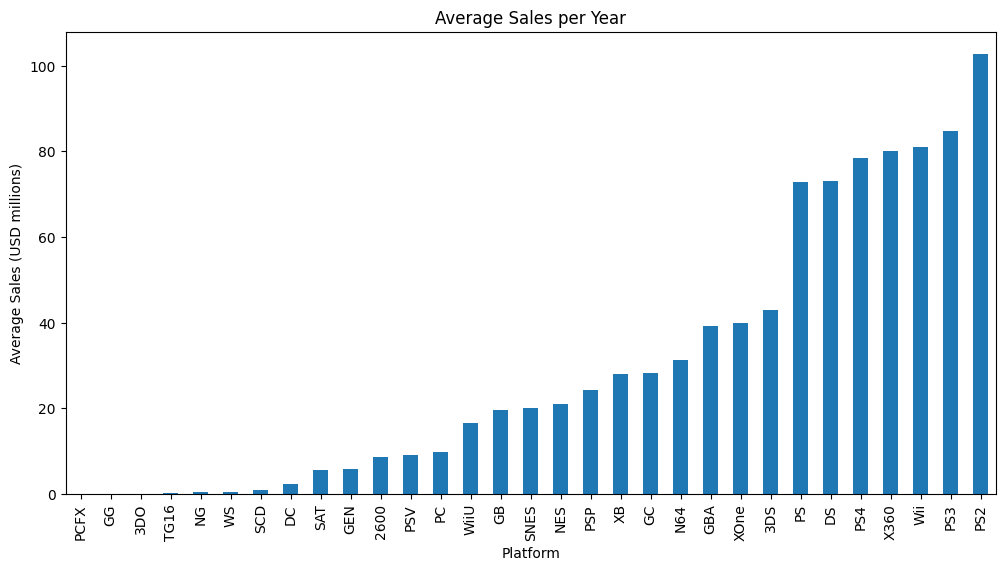

In [ ]:
platform_stats.sort_values(by='mean', inplace=True)
platform_stats.plot(kind='bar',
                    y='mean',
                    figsize=(12,6),
                    ylabel='Average Sales (USD millions)',
                    xlabel='Platform',
                    title='Average Sales per Year',
                    legend=False
                   )

__Observations__  
Most platforms have low to moderate average sales per year ($0M to ~$40M).  
Seven platforms (PS, DS, PS4, X360, Wii, PS3, PS2) have high average sales per year ($70+M).

#### 3.5.3&emsp;Sales Volatility

Compare variance for each platform

<AxesSubplot:title={'center':'Variance by Platform'}, xlabel='Platform', ylabel='Variance'>

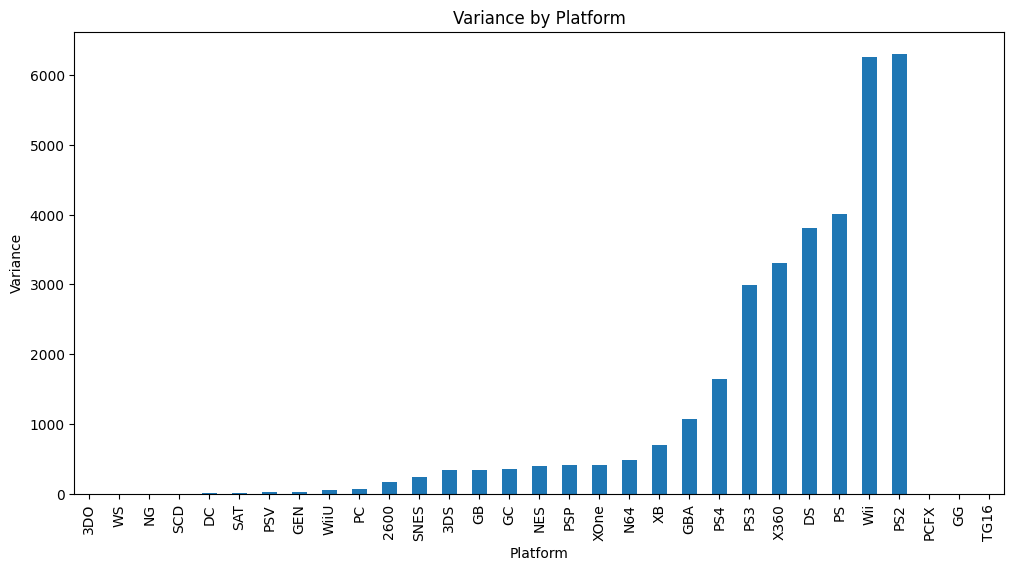

In [ ]:
platform_stats.sort_values(by='var', inplace=True)
platform_stats.plot(kind='bar',
                    y='var',
                    figsize=(12,6),
                    ylabel='Variance',
                    xlabel='Platform',
                    title='Variance by Platform',
                    legend=False,
                   )

__Observations__  
A high variance is common among platforms.

Compare the standard deviation for each platform

<AxesSubplot:title={'center':'Standard Deviation by Platform'}, xlabel='Platform', ylabel='Standard Deviation'>

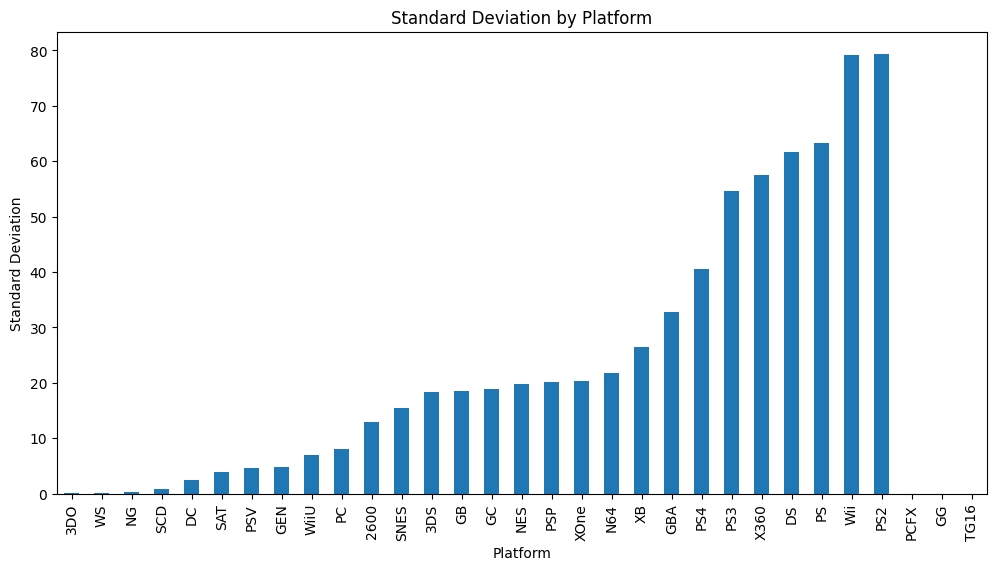

In [ ]:
platform_stats.sort_values(by='std_dev', inplace=True)
platform_stats.plot(kind='bar',
                    y='std_dev',
                    figsize=(12,6),
                    ylabel='Standard Deviation',
                    xlabel='Platform',
                    title='Standard Deviation by Platform',
                    legend=False,
                   )

__Observations__  
A high standard deviation is common among platforms.

### 3.6&emsp;Score Impact Analysis

Given that the PS4 platform had the highest total sales, it will be used to analyze the impact of critic and user scores on sales.

In [46]:
# Critic Scores
games_with_critic_score = games[~games.critic_score.isna()]
ps4_games_with_critic_score = games_with_critic_score[games_with_critic_score.platform == 'PS4']

# User Scores
games_with_user_score = games[~games.user_score.isna()]
ps4_games_with_user_score = games_with_user_score[games_with_user_score.platform == 'PS4']

# Calculate correlations
ps4_critic_score_corr = ps4_games_with_critic_score.critic_score.corr(ps4_games_with_critic_score.total_sales)
print(f'Critic score correlation: {ps4_critic_score_corr}')

ps4_user_score_corr = ps4_games_with_user_score.user_score.corr(ps4_games_with_user_score.total_sales)
print(f'User score correlation: {ps4_user_score_corr}')

Critic score correlation: 0.40656790206178095
User score correlation: -0.031957110204556376


<AxesSubplot:title={'center':'PS4 Sales vs. Critic Score'}, xlabel='Critic Score', ylabel='Total Sales (USD millions)'>

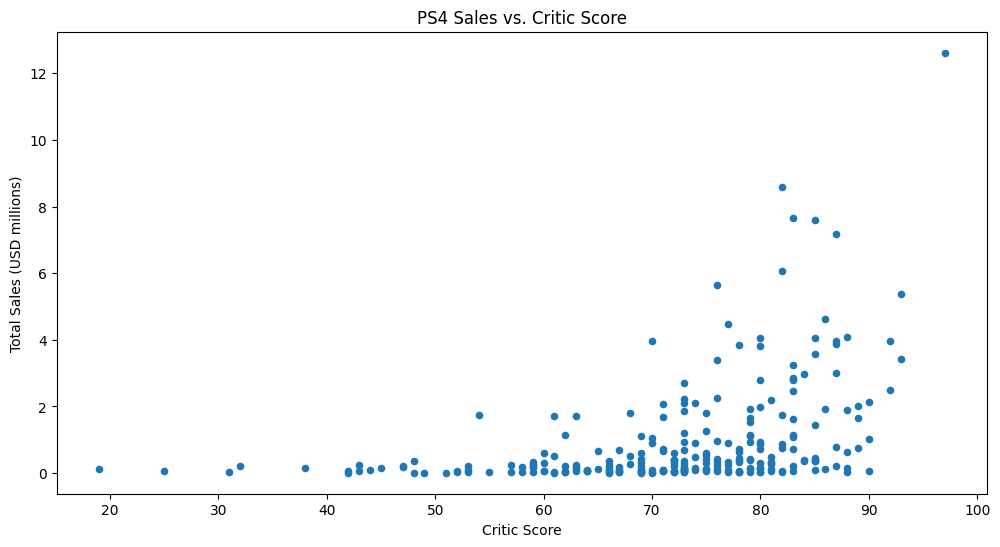

In [47]:
ps4_games_with_critic_score.plot(kind='scatter',
                                 x='critic_score',
                                 y='total_sales',
                                 xlabel='Critic Score',
                                 ylabel='Total Sales (USD millions)',
                                 title='PS4 Sales vs. Critic Score',
                                 figsize=(12,6)
                                )

__Observations__  
There is a moderately low correlation (0.4) between the critic's score and total sales for a PS4 game.

<AxesSubplot:title={'center':'PS4 Sales vs. User Score'}, xlabel='User Score', ylabel='Total Sales (USD millions)'>

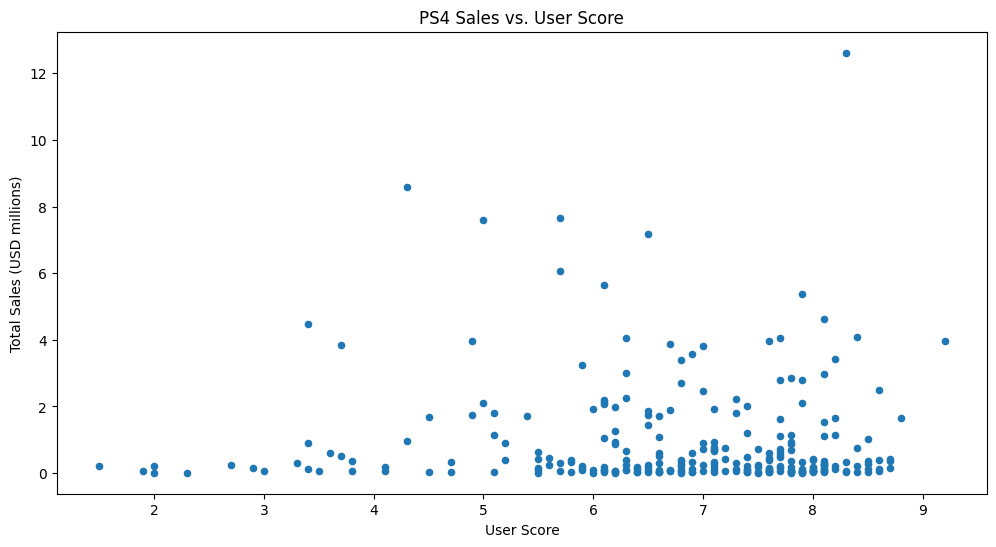

In [48]:
ps4_games_with_user_score.plot(kind='scatter',
                               x='user_score',
                               y='total_sales',
                               xlabel='User Score',
                               ylabel='Total Sales (USD millions)',
                               title='PS4 Sales vs. User Score',
                               figsize=(12,6)
                                )

__Observations__  
There is a low correlation (-0.03) between the user's score and total sales for a PS4 game.

### 3.7&emsp;Cross-Platform Comparison

Compare sales performance of games that were released on multiple platforms

In [ ]:
# Find games that were released on multiple platforms
ps4_games = games[games.platform == 'PS4']
ps4_games_on_multiple_platforms = games[games.name.isin(ps4_games.name)]
ps4_game_platform_count = ps4_games_on_multiple_platforms.groupby('name').size()
multiple_platform_ps4_games = ps4_game_platform_count[ps4_game_platform_count > 1]
multiple_platform_ps4_games

name
7 Days to Die                                 2
Adventure Time: Finn & Jake Investigations    6
Aegis of Earth: Protonovus Assault            3
Agatha Christie's The ABC Murders             2
Akiba's Trip: Undead & Undressed              3
                                             ..
Yakuza Zero: The Place of Oath                2
Yakuza: Ishin                                 2
Yoru no Nai Kuni                              3
ZombiU                                        3
Zombie Army Trilogy                           2
Length: 321, dtype: int64

In [50]:
# Retrieve the total sales on the PS4 platform for PS4 games that are on multiple platforms
multiple_platform_ps4_games_ps4_sales = games[(games.name.isin(multiple_platform_ps4_games.index)) & (games.platform == 'PS4')][['name', 'total_sales']]
multiple_platform_ps4_games_ps4_sales.rename({'total_sales': 'ps4_total_sales'}, axis='columns', inplace=True)
multiple_platform_ps4_games_ps4_sales

,name,ps4_total_sales
31,Call of Duty: Black Ops 3,14.63
42,Grand Theft Auto V,12.62
77,FIFA 16,8.58
87,Star Wars Battlefront (2015),7.98
92,Call of Duty: Advanced Warfare,7.66
...,...,...
16428,R.B.I. Baseball 2016,0.01
16499,Sherlock Holmes: The Devil's Daughter,0.01
16500,Root Letter,0.01
16503,Shin Hayarigami 2,0.01


In [51]:
# Retrieve the total sales on other platforms for PS4 games that are on multiple platforms
multiple_platform_ps4_games_other_sales = games[(games.name.isin(multiple_platform_ps4_games.index)) & (games.platform != 'PS4')][['name', 'total_sales']]
multiple_platform_ps4_games_other_sales = multiple_platform_ps4_games_other_sales.groupby('name').sum()
multiple_platform_ps4_games_other_sales = multiple_platform_ps4_games_other_sales.reset_index()
multiple_platform_ps4_games_other_sales.rename({'total_sales': 'other_total_sales'}, axis='columns', inplace=True)
multiple_platform_ps4_games_other_sales

,name,other_total_sales
0,7 Days to Die,0.05
1,Adventure Time: Finn & Jake Investigations,0.36
2,Aegis of Earth: Protonovus Assault,0.05
3,Agatha Christie's The ABC Murders,0.01
4,Akiba's Trip: Undead & Undressed,0.26
...,...,...
316,Yakuza Zero: The Place of Oath,0.25
317,Yakuza: Ishin,0.26
318,Yoru no Nai Kuni,0.13
319,ZombiU,1.02


In [52]:
# Limit the results to the top 10 games in total sales across all platforms
multiple_platform_ps4_game_sales = multiple_platform_ps4_games_ps4_sales.merge(multiple_platform_ps4_games_other_sales)
multiple_platform_ps4_game_sales['total_sales'] = multiple_platform_ps4_game_sales.ps4_total_sales + multiple_platform_ps4_game_sales.other_total_sales
multiple_platform_ps4_game_sales.sort_values(by='total_sales', ascending=False, inplace=True)
top_ten_multiple_platform_ps4_game_sales = multiple_platform_ps4_game_sales.iloc[:10]
top_ten_multiple_platform_ps4_game_sales

,name,ps4_total_sales,other_total_sales,total_sales
1,Grand Theft Auto V,12.62,43.96,56.58
19,Call of Duty: Ghosts,3.83,23.56,27.39
0,Call of Duty: Black Ops 3,14.63,11.04,25.67
11,Minecraft,4.32,19.84,24.16
4,Call of Duty: Advanced Warfare,7.66,14.31,21.97
55,The Elder Scrolls V: Skyrim,1.32,19.82,21.14
7,FIFA 15,6.08,11.29,17.37
25,FIFA 14,3.01,13.45,16.46
2,FIFA 16,8.58,7.72,16.30
21,Battlefield 4,3.58,10.36,13.94


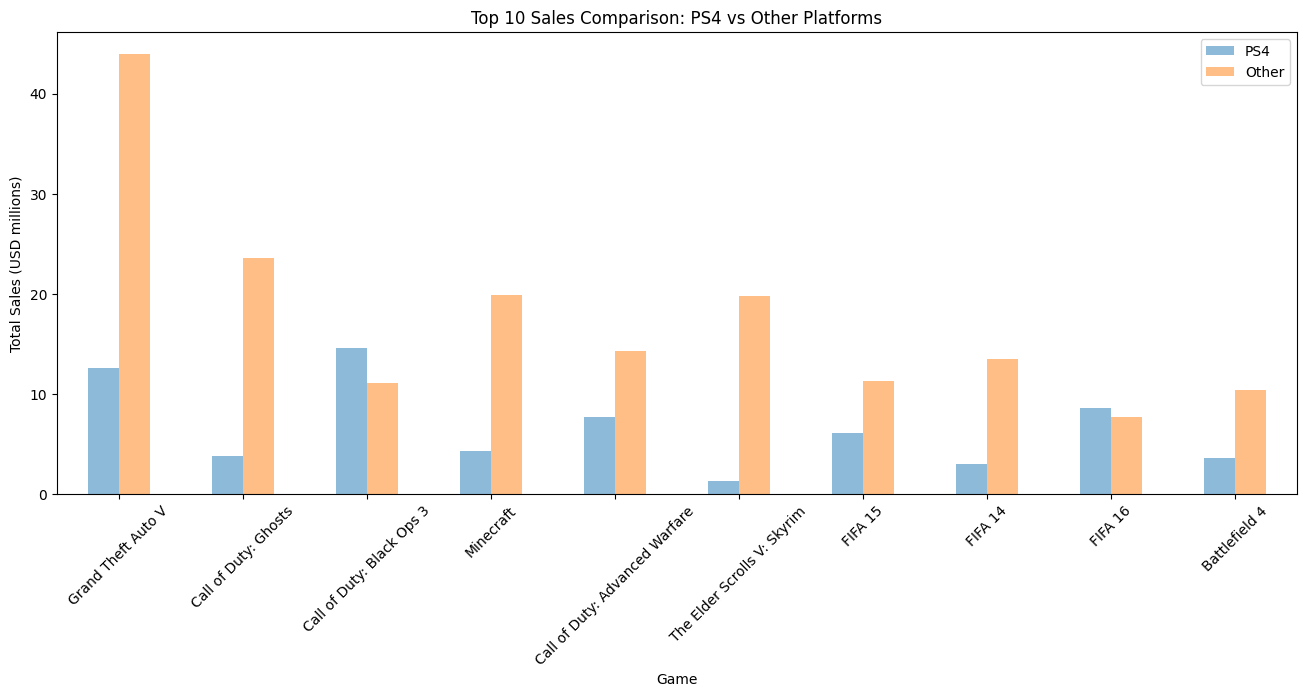

In [53]:
# Compare sales across platforms for these games
top_ten_multiple_platform_ps4_game_sales.plot(kind='bar',
                                              y=['ps4_total_sales', 'other_total_sales'],
                                              x='name',
                                              alpha=0.5,
                                              ylabel='Total Sales (USD millions)',
                                              xlabel='Game',
                                              rot=45,
                                              title='Top 10 Sales Comparison: PS4 vs Other Platforms',
                                              figsize=(16,6)
                                             )
plt.legend(['PS4', 'Other'])

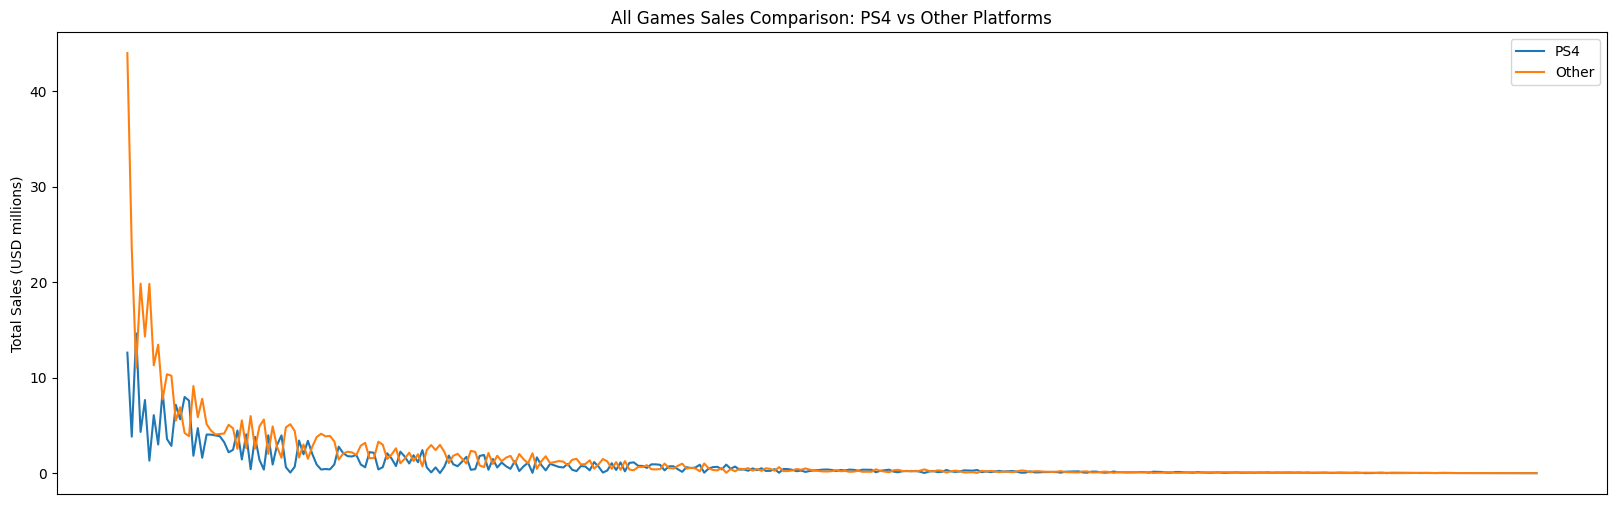

In [54]:
multiple_platform_ps4_game_sales.plot(kind='line',
                                      x='name',
                                      y=['ps4_total_sales', 'other_total_sales'],
                                      xlabel='Game',
                                      ylabel='Total Sales (USD millions)',
                                      title='All Games Sales Comparison: PS4 vs Other Platforms',
                                      figsize=(20,6)
                                     )
plt.legend(['PS4', 'Other'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels([])

__Observations__  
The PS4 platform had the highest total sales overall; however, for games that were released on other platforms, the combined sales of the other platforms exceeded the sales on the PS4 plaform in the majority of cases.  
This is true all PS4 games, even those in the top 10 in total sales.

### 3.8&emsp;Genre Analysis

#### 3.8.1&emsp;Total Sales by Genre

Calculate total sales by genre

In [ ]:
genre_sales = games.groupby('genre')[['total_sales']].sum().sort_values(by='total_sales', ascending=False)
genre_sales

,total_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


Visualize total sales by genre

<AxesSubplot:title={'center':'Sales by Genre'}, xlabel='Genre', ylabel='Total Sales (UDS millions)'>

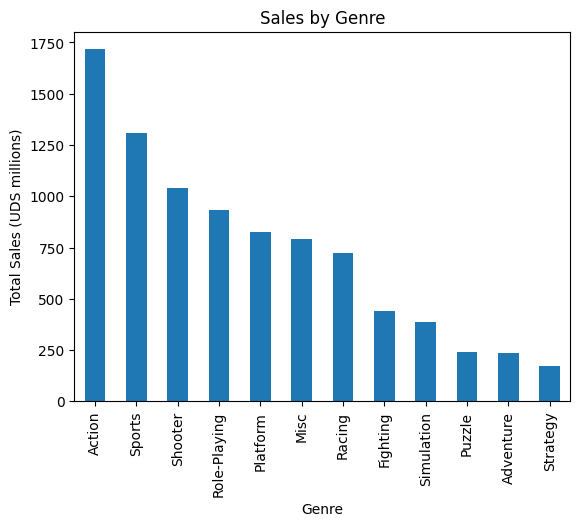

In [ ]:
genre_sales.plot(kind='bar',
                 title='Sales by Genre',
                 xlabel='Genre',
                 ylabel='Total Sales (UDS millions)',
                 legend=None
                )

Visualize market share by genre

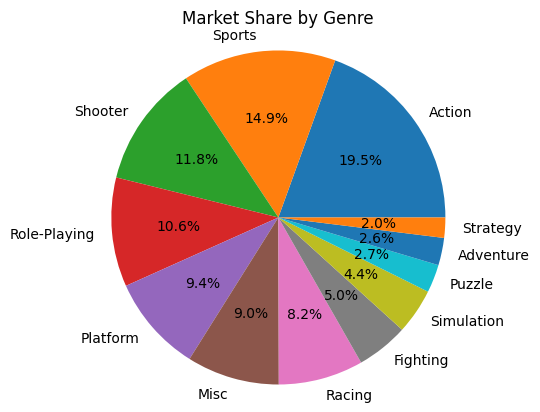

In [ ]:
total_sales_all_genres = genre_sales.total_sales.sum()

plt.pie(genre_sales.total_sales,
        labels=genre_sales.index,
        autopct='%1.1f%%',
       )
plt.title('Market Share by Genre')
plt.axis('equal')
plt.show()


__Observations__

Almost one-fifth of games sold are Action games.  
Combined with Sports, Shooter, and Role-Playing games, these four genres account for more than half of games sold.  
Puzzle, Adventure, and Strategy games provide minimal sales.

#### 3.8.2&emsp;Annual Sales by Genre

Calculate sales by genre for each year

In [ ]:
genre_sales_by_year = games.pivot_table(values='total_sales',
                                        index='year_of_release',
                                        columns='genre',
                                        aggfunc='sum',
                                        fill_value=0
                                       )
genre_sales_by_year

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.50,0.00
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00
1986,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.00
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00


Visualize annual sales performance by genre  

Use two graphs to avoid clutter

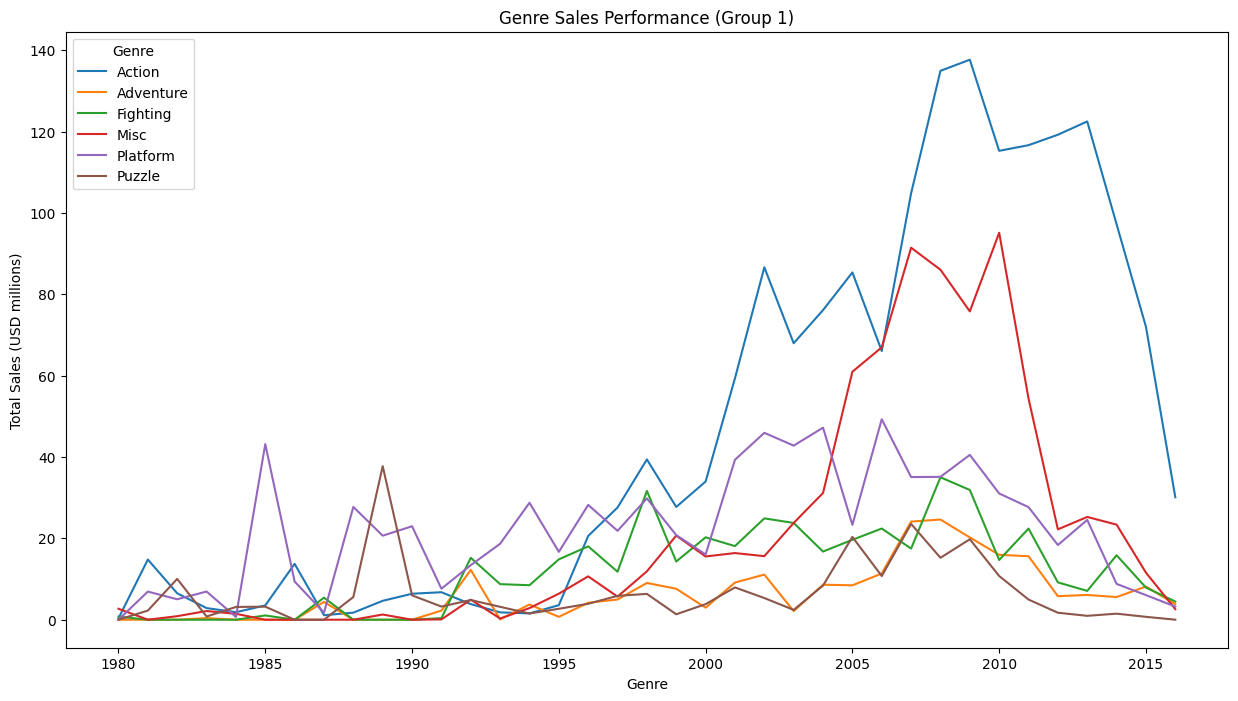

In [60]:
genre_sales_by_year.iloc[:,0:6].plot(kind='line',
                         title='Genre Sales Performance (Group 1)',
                         xlabel='Genre',
                         ylabel='Total Sales (USD millions)',
                         figsize=(15,8)
                        )
plt.legend(title='Genre')

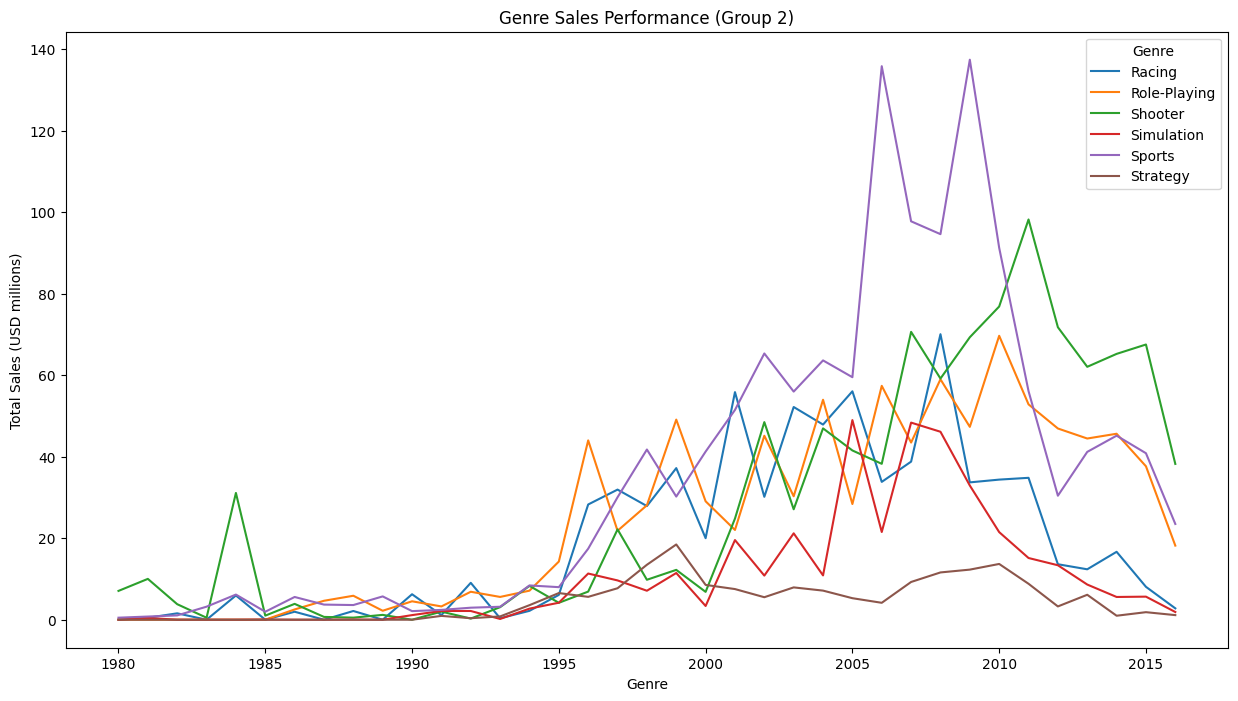

In [61]:
genre_sales_by_year.iloc[:,6:].plot(kind='line',
                         title='Genre Sales Performance (Group 2)',
                         xlabel='Genre',
                         ylabel='Total Sales (USD millions)',
                         figsize=(15,8)
                        )
plt.legend(title='Genre')

__Observations__  
Practically every genre has ups and downs in its sales performance.  
Strategy and Puzzle games have never sold well.  
The popularity of games overall began to grow around 1995.  
Action and Sports games peaked between 2005 and 2012.  
Shooter games had strong growth between 2008 and 2012.  
All game sales have dropped off since 2012.

## 4&emsp;Regional Market Analysis and User Profiles

### 4.1&emsp;Regional Platform Analysis

Calculate platform sales for each region

In [ ]:
platform_sales = games.groupby('platform')[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()
platform_sales

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
2600,80.78,4.86,0.00,86.48
3DO,0.00,0.00,0.10,0.10
3DS,82.65,61.27,100.62,257.81
DC,5.43,1.69,8.56,15.95
DS,380.31,188.41,175.02,802.78
GB,113.64,47.51,85.12,254.43
GBA,184.12,74.59,46.56,312.88
GC,131.94,38.32,21.34,196.73
GEN,19.27,5.52,2.67,28.35


Use the Top 5 platforms for analysis

In [63]:
top_5_platforms = platform_sales.nlargest(5, 'total_sales')
top_5_platforms

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS2,572.92,332.63,137.54,1233.56
X360,595.74,268.32,12.30,961.24
PS3,390.13,327.21,79.41,931.34
Wii,486.87,258.32,68.28,891.18
DS,380.31,188.41,175.02,802.78


Include only categories that are represented by the Top 5 platforms

In [64]:
top_5_platforms.index = top_5_platforms.index.remove_unused_categories()
top_5_platforms.index

CategoricalIndex(['PS2', 'X360', 'PS3', 'Wii', 'DS'], categories=['DS', 'PS2', 'PS3', 'Wii', 'X360'], ordered=False, name='platform', dtype='category')

In [65]:
top_platform_sales = platform_sales[platform_sales.index.isin(top_5_platforms.index)].sort_values(by='total_sales', ascending=False)
top_platform_sales

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS2,572.92,332.63,137.54,1233.56
X360,595.74,268.32,12.30,961.24
PS3,390.13,327.21,79.41,931.34
Wii,486.87,258.32,68.28,891.18
DS,380.31,188.41,175.02,802.78


### 4.2&emsp;Cross-Regional Platform Comparison

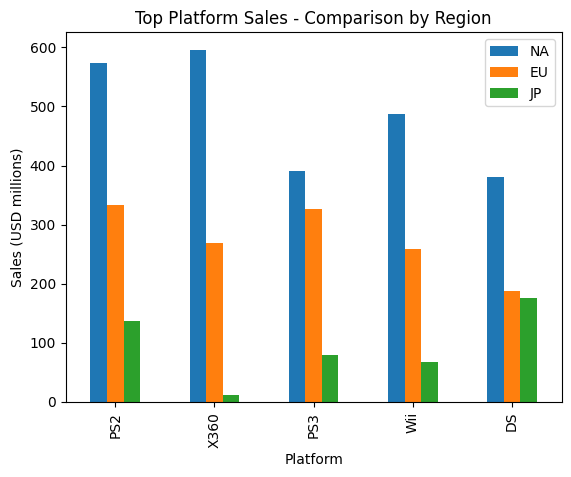

In [66]:
top_platform_sales.plot(kind='bar',
                        y=['na_sales', 'eu_sales', 'jp_sales'],
                        title='Top Platform Sales - Comparison by Region',
                        ylabel='Sales (USD millions)',
                        xlabel='Platform'
                       )
plt.legend(['NA', 'EU', 'JP'])

__Observations__  
Every platform has the most sales in North America, followed by Europe, then Japan.  

PS3 sales in Europe are about equal to sales in North America.  
>For other platforms, the North American sales are significantly higher than European sales.

For the DS platform, the sales in Japan and Europe are about equal.  
>For other platforms, the European sales greatly exceed sales in Japan.

### 4.3&emsp;Regional Genre Analysis

Calculate total sales by genre for each region

In [67]:
genre_sales = games.groupby('genre')[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()
genre_sales

,na_sales,eu_sales,jp_sales,total_sales
genre,,,,
Action,863.17,510.99,160.14,1716.52
Adventure,101.52,63.20,52.24,233.33
Fighting,220.51,99.00,87.28,442.66
Misc,399.57,210.60,107.02,790.29
Platform,444.44,199.39,130.71,825.55
Puzzle,121.13,49.78,56.68,239.89
Racing,356.86,234.49,56.63,723.49
Role-Playing,330.04,188.24,353.39,931.08
Shooter,584.83,314.52,38.68,1041.36


Use the Top 5 genres for analysis

In [68]:
top_5_genres = genre_sales.nlargest(5, 'total_sales')
top_5_genres

,na_sales,eu_sales,jp_sales,total_sales
genre,,,,
Action,863.17,510.99,160.14,1716.52
Sports,671.20,371.33,134.93,1309.67
Shooter,584.83,314.52,38.68,1041.36
Role-Playing,330.04,188.24,353.39,931.08
Platform,444.44,199.39,130.71,825.55


Include only the Top 5 genres

In [69]:
top_5_genres.index = top_5_genres.index.remove_unused_categories()
top_5_genres.index

CategoricalIndex(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'], categories=['Action', 'Platform', 'Role-Playing', 'Shooter', 'Sports'], ordered=False, name='genre', dtype='category')

Calculate sales by genre for each region

In [70]:
top_genre_sales = genre_sales[genre_sales.index.isin(top_5_genres.index)].sort_values(by='total_sales', ascending=False)
top_genre_sales

,na_sales,eu_sales,jp_sales,total_sales
genre,,,,
Action,863.17,510.99,160.14,1716.52
Sports,671.20,371.33,134.93,1309.67
Shooter,584.83,314.52,38.68,1041.36
Role-Playing,330.04,188.24,353.39,931.08
Platform,444.44,199.39,130.71,825.55


### 4.4&emsp;Cross-Regional Genre Comparison

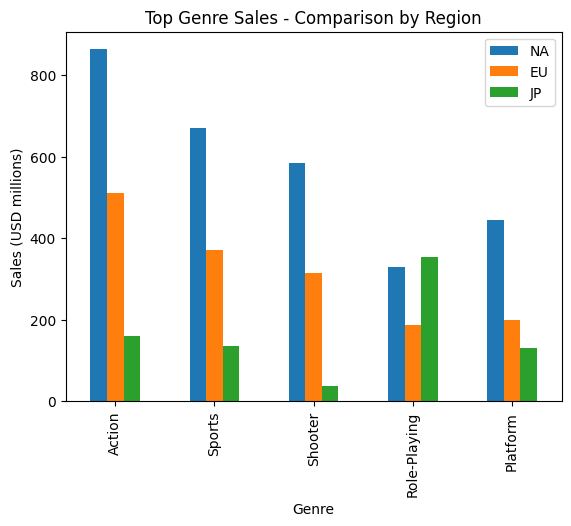

In [71]:
top_genre_sales.plot(kind='bar',
                     y=['na_sales', 'eu_sales', 'jp_sales'],
                     title='Top Genre Sales - Comparison by Region',
                     ylabel='Sales (USD millions)',
                     xlabel='Genre'
                    )
plt.legend(['NA', 'EU', 'JP'])

__Observations__  
North American sales  
>North American sales for the top 5 genres, other than Role-Playing, are significantly higher than sales in other regions.  

European sales  
>European sales are second for all of the top 5 genres, with the exception of Role-Playing games.

Japan sales  
>In Japan, Action, Sports, and Platform games are about equal in terms of sales.  
>Japan has minimal sales of Shooter games.

Role-Playing games  
>Role-Playing games have slightly higher sales in Japan than in North America.

### 4.5&emsp;ESRB Rating Impact Analysis

Calculate sales by ESRB rating for each region

In [72]:
sales_by_rating = games.groupby(['rating'])[['rating', 'na_sales', 'eu_sales', 'jp_sales']].sum()
sales_by_rating

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1274.24,703.87,197.96
E10+,345.50,183.35,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,742.89,480.00,63.58
NR,1225.84,609.65,836.74
RP,0.00,0.03,0.00
T,747.60,421.79,150.70


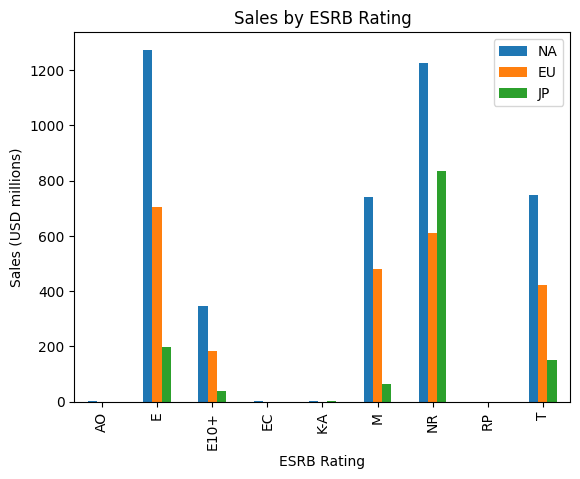

In [73]:
sales_by_rating.plot(kind='bar',
                     y=['na_sales', 'eu_sales', 'jp_sales'],
                     title='Sales by ESRB Rating',
                     ylabel='Sales (USD millions)',
                     xlabel='ESRB Rating'
                    )
plt.legend(['NA', 'EU', 'JP'])

__Observations__  
North American Sales  
>High:     E, NR  
>Moderate: M, T  
>Low:      E10+  
>Very Low: AO, EC, K-A, RP

European Sales  
>High:     E, M, NR, T    
>Low:      E10+  
>Very Low: AO, EC, K-A, RP

Japanese Sales
>High:     NR  
>Low:      E, E10+, M, T  
>Very Low: AO, EC, K-A, RP

Overall  
>NR games have high sales in all three regions.  
>E10+ games have low sales in all three regions.  
>A0, EC, K-A, RP games have very low sales in all three regions.  

## 5&emsp;Hypothesis Tests

### 5.1&emsp;Average user ratings of the Xbox One and PC platforms are the same

H<sub>0</sub> - Average user ratings of the Xbox One and PC platforms are the same.  
H<sub>1</sub> - Average user ratings of the Xbox One and PC platforms differ.  

Include games with user ratings for each of the platforms (exclude games that have no rating).  
Null hypothesis states that the user ratings are the same.  
Alternative hypothesis states that they are not the same.  

Use the ttest_ind function to test the equality of two population means.  
Specify equal_var=False because the samples are quite different in size.

In [74]:
# User ratings for Xbox One and PC platforms
xbox_one_user_ratings = games.user_score[(games.platform == "XOne") & ~games.user_score.isna()]
pc_user_ratings = games.user_score[(games.platform == "PC") & ~games.user_score.isna()]

print(f'Xbox rating count: {xbox_one_user_ratings.count()}')
print(f'PC rating count: {pc_user_ratings.count()}')

alpha = 0.05

# Use equal_var=False because the samples are different sizes
results = st.ttest_ind(xbox_one_user_ratings, pc_user_ratings, equal_var=False)

print()
print('equal_var=False')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Xbox rating count: 182
PC rating count: 755

equal_var=False
p-value: 4.5385802963771835e-06
We reject the null hypothesis


__Conclusion__  

User ratings are not the same for Xbox One and PC platform games.

### 5.2&emsp;Average user ratings for the Action and Sports genres are different

H<sub>0</sub> - Average user ratings of the Action and Sports genres are the same.  
H<sub>1</sub> - Average user ratings of the Action and Sports genres differ.  

Include games with user ratings for each of these two genres (exclude games that have no rating).  

Even though we are testing for the user ratings of the genres being different, the null hypothesis is always that they are equal.  
Null hypothesis states that the user ratings are the same.  
Alternative hypothesis states that they are not the same.  

Use the ttest_ind function to test the equality of two population means.  
Specify equal_var=False because the samples are different in size.

In [75]:
# User ratings for Action and Sports genres
action_user_ratings = games.user_score[(games.genre == "Action") & ~games.user_score.isna()]
sports_user_ratings = games.user_score[(games.genre == "Sports") & ~games.user_score.isna()]

print(f'Action rating count: {action_user_ratings.count()}')
print(f'Sports rating count: {sports_user_ratings.count()}')

alpha = 0.05

# Use equal_var=False because the samples are different sizes
results = st.ttest_ind(action_user_ratings, sports_user_ratings, equal_var=False)

print()
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Action rating count: 1796
Sports rating count: 1081

p-value: 0.07370217419278526
We can't reject the null hypothesis


__Conclusion__  

User ratings for the Action and Sports genres are different.

## 6&emsp;Summary


__Conclusions__  

Game Release Trends  
>The most significant numbers of game releases occurred in 2008 and 2009.  
>There was a somewhat steady upward trend beginning in 1991, which continued through 2009.  
>Releases began a steady decline in 2010, which continued through 2016.  
>There was a precipitous drop in releases from 2011 to 2012.  

Platform Trends  
>Platforms with significant sales typically last from 6-8 years.

>Sales
>>Most platforms have low to moderate average sales per year ($0M to ~$40M).  
>Half of the platforms have sales between $25M and $300M.  
>Most platforms have sales of no more than $300M.  
>Eight platforms (25% of 31) have sales exceeding $300M.  
>>Six of these exceed $700M, with one exceeding $1200M ($1.2B).  
>Variance and standard deviation are high among the platforms.  

>All platforms declined in sales from 2015 to 2016.

>PS4 and Xbox One were released in 2013.  
>>Both grew in sales through 2015, with PS4 having twice the sales of Xbox One.

>PS3 and Xbox 360 had virtually non-existent sales by 2016.  

>The most successful platforms have been:  
>>DS  
>>PS, PS2, PS3, PS4  
>>>Each "declining" PlayStation platform was replaced with an upgrade.  

>>Wii  
>>X360  
>>>Xbox (XB) was replaced by Xbox 360 (X360), which was then replaced by Xbox One (XOne).  
>>>Of these three, Xbox 360 was the most successful.

PS4 Platform
>The PS4 platform has the highest sales overall.  
>Critic and user scores have little correlation to sales.  
>For games that were released on both the PS4 platform and other platforms, the combined sales of the other platforms were higher than the PS4 platform.

Genre Trends  
>Sales  
>>Practically every genre has ups and downs in sales performance.  
>>The Action genre accounts for almost 20% of games sold.  
>>The combination of Action, Sports, Shooter, and Role-Playing games accounts for more than half of the games sold.  
>>Puzzle, Adventure, and Strategy games provide minimal sales.

>Popularity  
>>The popularity of games overall began to grow around 1995.  
>>Action and Sports games peaked between 2005 and 2012.  
>>Shooter games had strong growth between 2008 and 2012.  
>>All games sales have dropped off since 2012.  

Regional Trends
>North America  
>>North America has the most sales for every platform, followed by Europe, then Japan.  
>>For the top 5 genres other than Role-Playing, North American sales are significantly higher than sales in other regions.  

>Europe  
>>PS3 sales in Europe are about equal to sales in North America.  
>>>For other platforms, the North American sales are significantly higher than European sales.  
>>For the DS platform, the sales in Japan and Europe are about equal.  
>>>For other platforms, the European sales greatly exceed sales in Japan.  

>Japan  
>>Action, Sports, and Platform games are about equal in terms of sales.  
>>Japan has minimal sales of Shooter games.  
>>Role-Playing games have slightly higher sales in Japan than in North America.  
>>For the DS platform, the sales in Japan and Europe are about equal.  
>>>For other platforms, the European sales greatly exceed sales in Japan.  

Rating Trends
>North American Sales  
>>High:     E, NR  
>>Moderate: M, T  
>>Low:      E10+  
>>Very Low: AO, EC, K-A, RP

>European Sales  
>>High:     E, M, NR, T    
>>Low:      E10+  
>>Very Low: AO, EC, K-A, RP

>Japanese Sales
>>High:     NR  
>>Low:      E, E10+, M, T  
>>Very Low: AO, EC, K-A, RP

>Overall  
>>NR games have high sales in all three regions.  
>>E10+ games have low sales in all three regions.  
>>A0, EC, K-A, RP games have very low sales in all three regions.  

Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
>User ratings are not the same for Xbox One and PC platform games.

Hypothesis: Average user ratings for the Action and Sports genres are different.
>User ratings for the Action and Sports genres are different.